In [ ]:
import os
import shutil
from glob import glob

# Source directory where all images are stored
source_dir = "dataset/portrait-personality-3"
output_dir = "grouped_personality-3"

os.makedirs(output_dir, exist_ok=True)

# Get all jpg files
image_paths = glob(os.path.join(source_dir, "*.jpg"))

for img_path in image_paths:
    filename = os.path.basename(img_path)
    
    # Extract the video ID: everything before '.mp4-'
    if ".mp4-" in filename:
        video_id = filename.split(".mp4-")[0]
    else:
        continue  # Skip if doesn't follow pattern

    # Create a folder for this video ID if not exists
    video_folder = os.path.join(output_dir, video_id)
    os.makedirs(video_folder, exist_ok=True)

    # Destination path
    dest_path = os.path.join(video_folder, filename)
    shutil.copy2(img_path, dest_path)  # use shutil.move if you want to move

print("Images grouped into folders based on video ID.")


In [3]:
import os
import shutil
import random

source_dir = 'prepared_dataset'
output_base = 'split_dataset'
train_ratio, val_ratio, test_ratio = 0.6, 0.2, 0.2

# Ensure reproducibility
random.seed(42)

# Create output folders
for split in ['train', 'val', 'test']:
    os.makedirs(os.path.join(output_base, split), exist_ok=True)

# Get all class folders
all_classes = [f for f in os.listdir(source_dir) if os.path.isdir(os.path.join(source_dir, f))]
random.shuffle(all_classes)

# Split folders
n_total = len(all_classes)
n_train = int(n_total * train_ratio)
n_val = int(n_total * val_ratio)

train_classes = all_classes[:n_train]
val_classes = all_classes[n_train:n_train + n_val]
test_classes = all_classes[n_train + n_val:]

# Function to copy folders
def copy_class_folders(class_list, split_name):
    for class_name in class_list:
        src = os.path.join(source_dir, class_name)
        dst = os.path.join(output_base, split_name, class_name)
        shutil.copytree(src, dst)

# Copy each split
copy_class_folders(train_classes, 'train')
copy_class_folders(val_classes, 'val')
copy_class_folders(test_classes, 'test')

print("Split complete!")


Split complete!


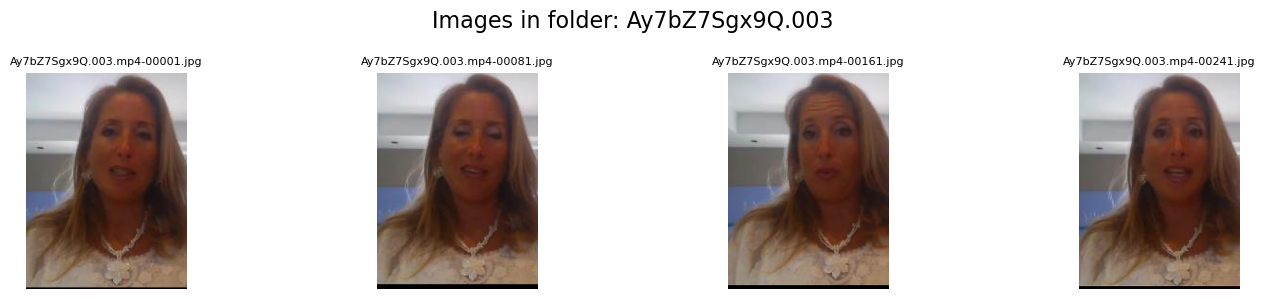

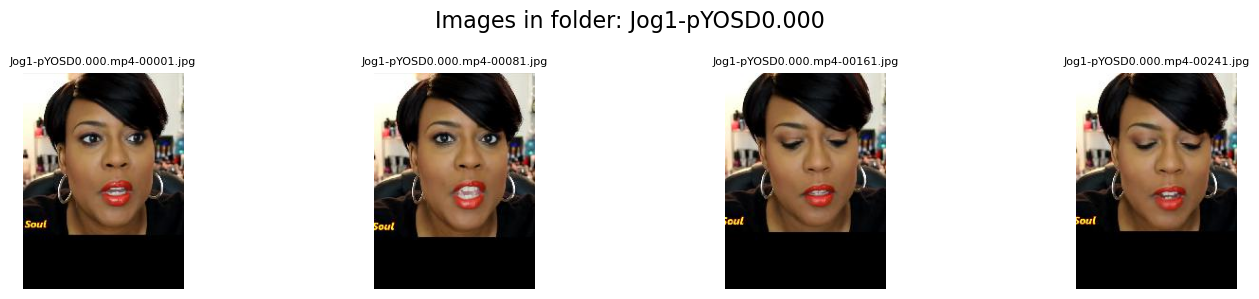

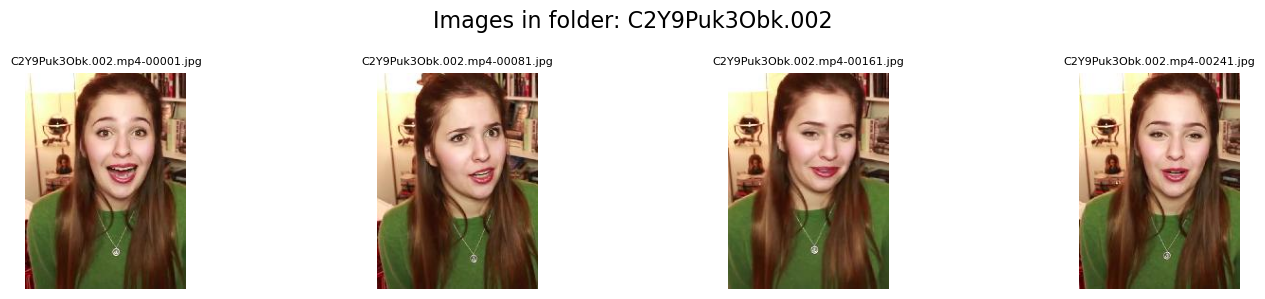

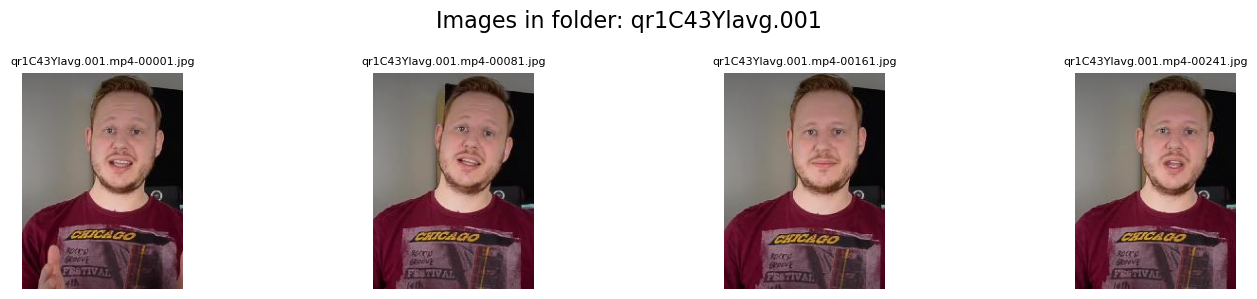

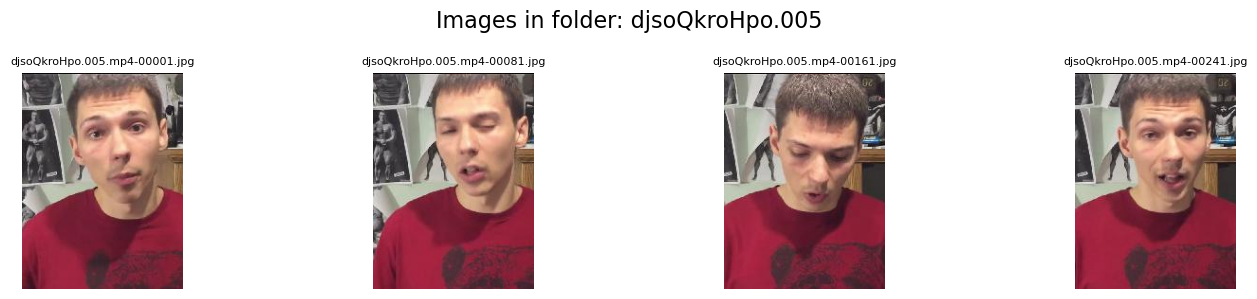

In [4]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to your 'prepared_dataset' folder
base_path = 'split_dataset/train'

# Get all subfolder names
all_folders = [folder for folder in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, folder))]

# Select 5 random folders (or first 5 if you want)
# selected_folders = all_folders[:5]  # <-- First 5
selected_folders = random.sample(all_folders, 5)  # <-- Random 5 if you prefer

for folder_name in selected_folders:
    folder_path = os.path.join(base_path, folder_name)
    images = [img for img in os.listdir(folder_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]
    
    if images:
        n_images = len(images)
        n_cols = min(5, n_images)  # Max 5 images per row
        n_rows = (n_images + n_cols - 1) // n_cols
        
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 3 * n_rows))
        axes = axes.flatten() if n_images > 1 else [axes]
        
        for idx, image_name in enumerate(images):
            img_path = os.path.join(folder_path, image_name)
            img = mpimg.imread(img_path)
            axes[idx].imshow(img)
            axes[idx].axis('off')
            axes[idx].set_title(image_name, fontsize=8)
        
        # Hide unused subplots
        for idx in range(n_images, len(axes)):
            axes[idx].axis('off')
            
        plt.suptitle(f'Images in folder: {folder_name}', fontsize=16)
        plt.tight_layout()
        plt.show()


In [ ]:
# !pip install torch torchvision xgboost
# !pip install tqdm

In [5]:
import pandas as pd

# Load the CSV
df = pd.read_csv('dataset/bigfive_labels.csv')  # replace with your actual file name

# Show basic info about the CSV
print(df.info())

# Show the first few rows of data
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   VideoName               8000 non-null   object 
 1   ValueExtraversion       8000 non-null   float64
 2   ValueAgreeableness      8000 non-null   float64
 3   ValueConscientiousness  8000 non-null   float64
 4   ValueNeurotisicm        8000 non-null   float64
 5   ValueOpenness           8000 non-null   float64
dtypes: float64(5), object(1)
memory usage: 375.1+ KB
None


VideoName  ValueExtraversion  ValueAgreeableness  \
0  GQczMGrVgbc.001.mp4           0.570093            0.703297   
1  -utrsarZeIY.004.mp4           0.523364            0.516484   
2  3HA2W1s4oP8.001.mp4           0.401869            0.538462   
3  hM96SfN5_F4.004.mp4           0.485981            0.637363   
4  SgzOYog1pH4.003.mp4           0.532710            0.527473   

   ValueConscientiousness  ValueNeurotisicm  ValueOpenness  
0                0.640777          0.666667       0.544444  
1                0.436893          0.333333       0.411111  
2                0.427184          0.510417       0.388889  
3                0.359223          0.458333       0.566667  
4                0.650485          0.458333       0.477778

In [6]:
df.columns

Index(['VideoName', 'ValueExtraversion', 'ValueAgreeableness',
       'ValueConscientiousness', 'ValueNeurotisicm', 'ValueOpenness'],
      dtype='object')

In [1]:
import os
import pandas as pd

# Set paths
image_root = "prepared_dataset"  # folder with 7,997 subfolders
csv_path = "dataset/bigfive_labels.csv"  # path to CSV file

# 1. Count total number of images
total_images = 0
subfolder_count = 0

for subfolder in os.listdir(image_root):
    subfolder_path = os.path.join(image_root, subfolder)
    if os.path.isdir(subfolder_path):
        subfolder_count += 1
        total_images += sum(1 for f in os.listdir(subfolder_path) if f.endswith(".jpg"))

print(f"Total subfolders (videos): {subfolder_count}")
print(f"Total number of images: {total_images}")

# 2. Count data points for each Big Five label
df = pd.read_csv(csv_path)
print("\nNumber of data points per Big Five label:")
print(df.iloc[:, 1:6].notnull().sum())


Total subfolders (videos): 7997
Total number of images: 30925

Number of data points per Big Five label:
ValueExtraversion         8000
ValueAgreeableness        8000
ValueConscientiousness    8000
ValueNeurotisicm          8000
ValueOpenness             8000
dtype: int64


In [3]:
import os

split_paths = {
    "train": "split_dataset/train",
    "val": "split_dataset/val",
    "test": "split_dataset/test"
}

for split, path in split_paths.items():
    total = 0
    for sub in os.listdir(path):
        sub_path = os.path.join(path, sub)
        if os.path.isdir(sub_path):
            total += sum(1 for f in os.listdir(sub_path) if f.endswith(".jpg"))
    print(f"Total images in {split}: {total}")


Total images in train: 18561
Total images in val: 6184
Total images in test: 6180


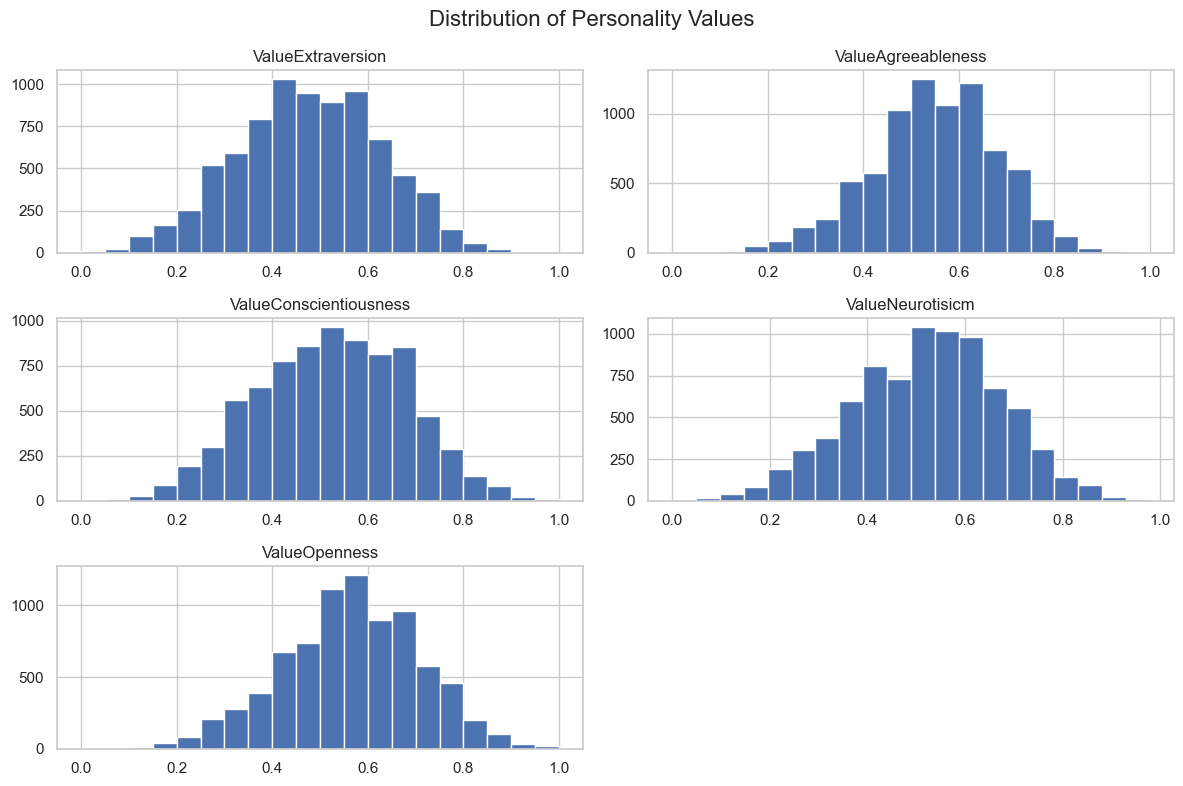

c:\Users\muham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\muham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\muham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\muham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

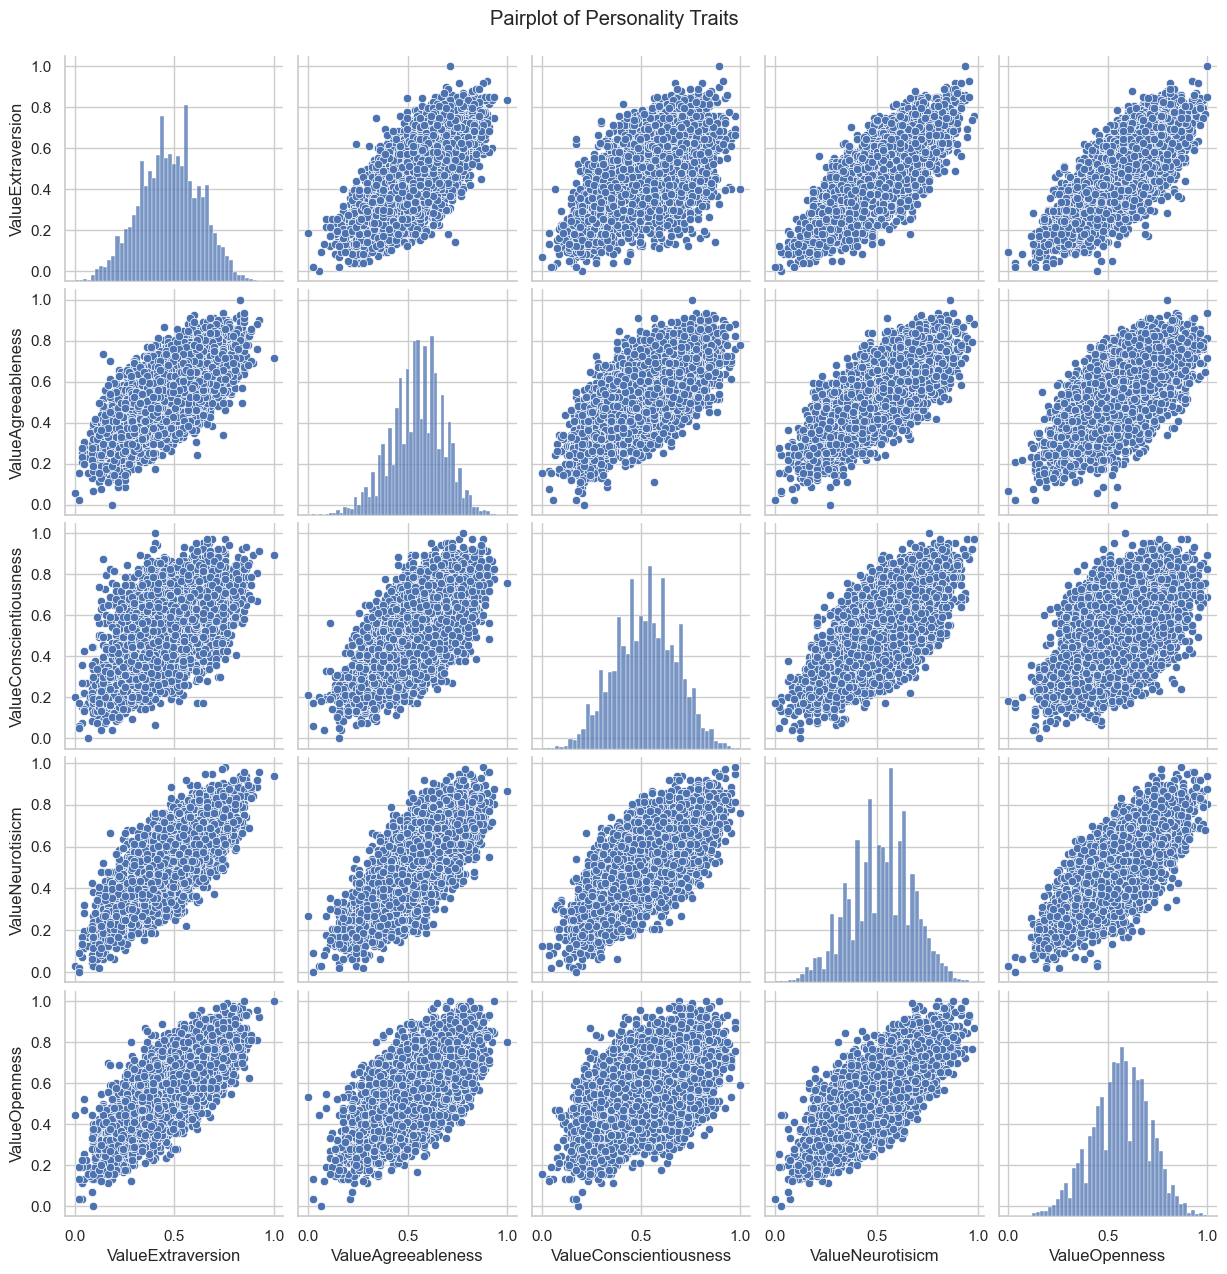

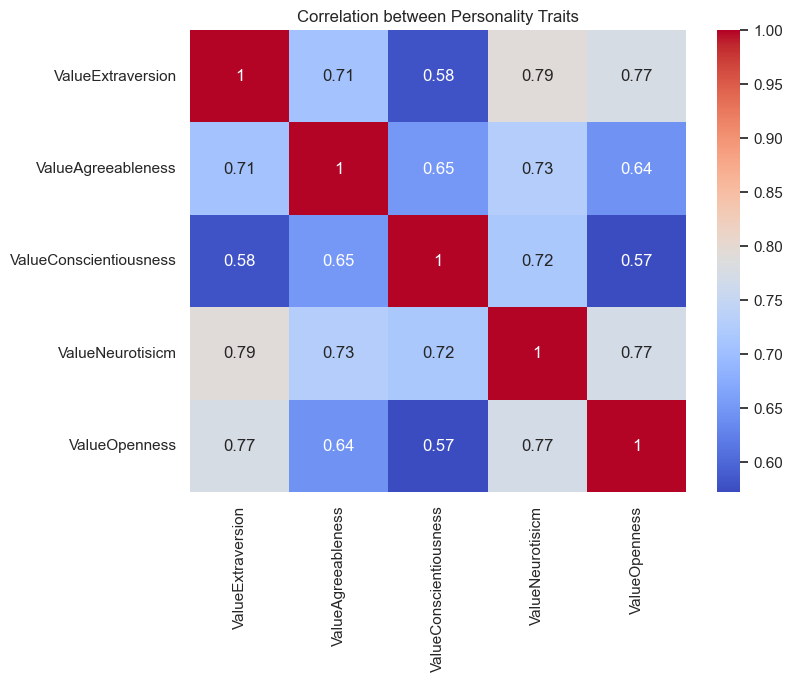

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
# Drop 'VideoName' because it's not numeric
numeric_df = df.drop(columns=['VideoName'])

# Set the style
sns.set(style="whitegrid")

# Plot histograms for each numeric column
numeric_df.hist(figsize=(12, 8), bins=20)
plt.suptitle('Distribution of Personality Values', fontsize=16)
plt.tight_layout()
plt.show()

# Plot pairplot to see relationships between features
sns.pairplot(numeric_df)
plt.suptitle('Pairplot of Personality Traits', y=1.02)
plt.show()

# Plot a correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Personality Traits')
plt.show()

In [8]:
import os
import torch
import numpy as np
import pandas as pd
from PIL import Image
from tqdm import tqdm
from torchvision import models, transforms

# === Setup ===
csv_path = "dataset/bigfive_labels.csv"
split_base = "split_dataset"  # This should contain train/, val/, test/
splits = ['train', 'val', 'test']

# Load label CSV
df = pd.read_csv(csv_path)
df["VideoID"] = df["VideoName"].str.replace(".mp4", "", regex=False)

# Image preprocessing
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# Load ResNet50 without final classification layer
resnet = models.resnet50(pretrained=True)
resnet = torch.nn.Sequential(*list(resnet.children())[:-1])
resnet.eval().cuda()

# === Feature extraction function ===
def extract_features_from_folder(folder_path):
    features = []
    for img_name in os.listdir(folder_path):
        if not img_name.lower().endswith(".jpg"):
            continue
        img_path = os.path.join(folder_path, img_name)
        image = Image.open(img_path).convert("RGB")
        image = transform(image).unsqueeze(0).cuda()
        with torch.no_grad():
            feature = resnet(image).squeeze().cpu().numpy()
        features.append(feature)
    if len(features) == 0:
        return None
    return np.mean(features, axis=0)

# === Loop over splits ===
all_data = {}

for split in splits:
    print(f"\nProcessing split: {split}")
    split_path = os.path.join(split_base, split)
    
    X_split = []
    y_split = []
    failed = []

    for folder in tqdm(os.listdir(split_path)):
        folder_path = os.path.join(split_path, folder)
        if not os.path.isdir(folder_path):
            continue

        features = extract_features_from_folder(folder_path)
        if features is None:
            failed.append(folder)
            continue

        row = df[df["VideoID"] == folder]
        if row.empty:
            failed.append(folder)
            continue

        labels = row.iloc[0, 1:6].values.astype(np.float32)  # assuming cols 1–5 are labels
        X_split.append(features)
        y_split.append(labels)

    all_data[f'X_{split}'] = np.array(X_split)
    all_data[f'y_{split}'] = np.array(y_split)

    print(f"{split.upper()} — X: {len(X_split)}, y: {len(y_split)}, Failed: {len(failed)}")

# Example: Access your splits
X_train = all_data['X_train']
y_train = all_data['y_train']
X_val   = all_data['X_val']
y_val   = all_data['y_val']
X_test  = all_data['X_test']
y_test  = all_data['y_test']

os.makedirs("extracted_features", exist_ok=True)
# Save arrays to extracted_features/ folder
for key, array in all_data.items():
    save_path = os.path.join("extracted_features", f"{key}.npy")
    np.save(save_path, array)
    print(f"Saved {key} to {save_path}")



c:\Users\muham\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\muham\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)



Processing split: train


100%|██████████| 4798/4798 [02:10<00:00, 36.76it/s]


TRAIN — X: 4798, y: 4798, Failed: 0

Processing split: val


100%|██████████| 1599/1599 [00:42<00:00, 37.27it/s]


VAL — X: 1599, y: 1599, Failed: 0

Processing split: test


100%|██████████| 1600/1600 [00:42<00:00, 37.52it/s]


TEST — X: 1600, y: 1600, Failed: 0
Saved X_train to extracted_features\X_train.npy
Saved y_train to extracted_features\y_train.npy
Saved X_val to extracted_features\X_val.npy
Saved y_val to extracted_features\y_val.npy
Saved X_test to extracted_features\X_test.npy
Saved y_test to extracted_features\y_test.npy


In [1]:
import numpy as np
# Load features and labels
X = np.load("extracted_features/X_train.npy")
y = np.load("extracted_features/y_train.npy")

In [2]:
import random

# Pick 5 random indices
sample_indices = random.sample(range(len(X)), 5)

# Print samples
for idx in sample_indices:
    print(f"Sample {idx}:")
    print(f"Feature (X): {X[idx]}")
    print(f"Label (y): {y[idx]}")
    print("-" * 50)


Sample 269:
Feature (X): [0.01262302 0.43325096 0.6720815  ... 0.0807951  0.03581356 0.09808701]
Label (y): [0.57009345 0.5714286  0.5339806  0.35416666 0.56666666]
--------------------------------------------------
Sample 3627:
Feature (X): [0.18711792 1.0147061  1.0174118  ... 0.11214748 0.25741005 0.13597995]
Label (y): [0.62616825 0.71428573 0.70873785 0.71875    0.75555557]
--------------------------------------------------
Sample 2899:
Feature (X): [0.02195216 0.9451114  0.6448249  ... 0.05435203 0.21754627 0.14104971]
Label (y): [0.6448598  0.71428573 0.7669903  0.5729167  0.75555557]
--------------------------------------------------
Sample 4152:
Feature (X): [0.29669857 1.578946   0.38593543 ... 0.479066   0.39729175 0.21177667]
Label (y): [0.6635514  0.72527474 0.79611653 0.78125    0.6888889 ]
--------------------------------------------------
Sample 1308:
Feature (X): [0.9993062  0.9121709  0.29231387 ... 0.12783861 0.4973526  0.09551386]
Label (y): [0.317757   0.23076923 0

In [3]:
X.shape, y.shape

((4798, 2048), (4798, 5))

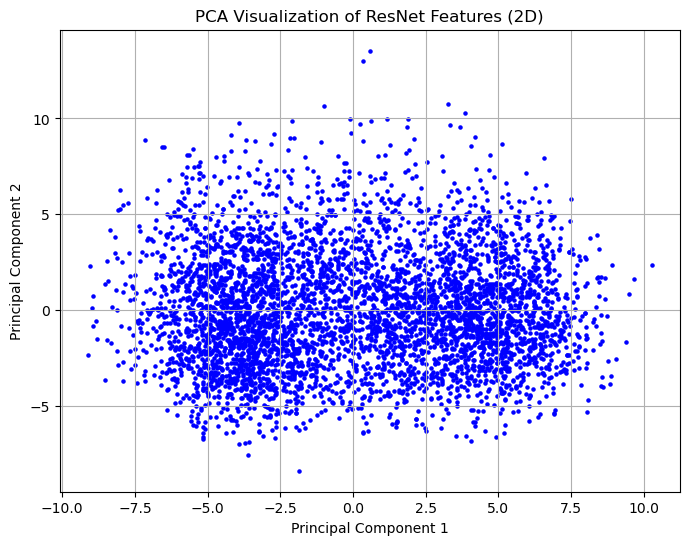

In [4]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce to 2 components just for visualization
pca_vis = PCA(n_components=2)
X_vis = pca_vis.fit_transform(X)

# Plot
plt.figure(figsize=(8,6))
plt.scatter(X_vis[:, 0], X_vis[:, 1], c='blue', s=5)  # you can also color by y if classification
plt.title('PCA Visualization of ResNet Features (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

In [5]:
import numpy as np
from sklearn.decomposition import PCA
import os

# === Load saved features ===
base_path = "extracted_features"
X_train = np.load(os.path.join(base_path, "X_train.npy"))
y_train = np.load(os.path.join(base_path, "y_train.npy"))
X_val   = np.load(os.path.join(base_path, "X_val.npy"))
y_val   = np.load(os.path.join(base_path, "y_val.npy"))
X_test  = np.load(os.path.join(base_path, "X_test.npy"))
y_test  = np.load(os.path.join(base_path, "y_test.npy"))


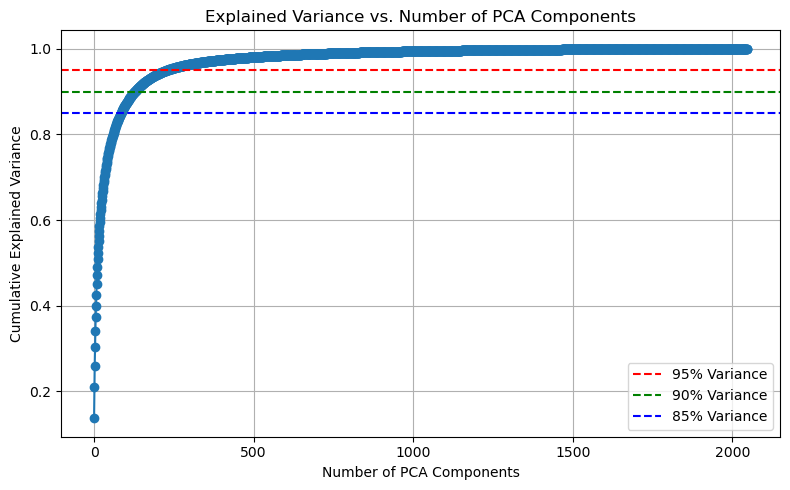

95% variance is explained by 230 components
90% variance is explained by 129 components
85% variance is explained by 86 components


In [6]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Assume X_train is already loaded (shape: [n_samples, 2048])

# Fit PCA without reducing dimensions (keep all)
pca_full = PCA().fit(X_train)

# Cumulative explained variance
cum_var = np.cumsum(pca_full.explained_variance_ratio_)

# Plot cumulative variance
plt.figure(figsize=(8, 5))
plt.plot(cum_var, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance')
plt.axhline(y=0.90, color='g', linestyle='--', label='90% Variance')
plt.axhline(y=0.85, color='b', linestyle='--', label='85% Variance')
plt.xlabel('Number of PCA Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of PCA Components')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Find how many components are needed for each threshold
thresholds = [0.95, 0.90, 0.85]
for t in thresholds:
    num_components = np.argmax(cum_var >= t) + 1
    print(f"{t*100:.0f}% variance is explained by {num_components} components")


In [7]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, r2_score,
    explained_variance_score, max_error, median_absolute_error
)
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import warnings
warnings.filterwarnings("ignore")


In [8]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from sklearn.multioutput import MultiOutputRegressor
from xgboost import XGBRegressor

# === Helper Function ===
def log_search_results(name, search_obj):
    print(f"\nTuning summary for {name}:")
    print("Best parameters:", search_obj.best_params_)
    print(f"Best neg_MSE score: {search_obj.best_score_:.4f}")
    results_df = pd.DataFrame(search_obj.cv_results_).sort_values(by='mean_test_score', ascending=False)
    print("Top parameter sets:")
    print(results_df[['params', 'mean_test_score']].head(3))


models = {}

# Random Forest Tuning
print("Tuning Random Forest...")
rf_base = RandomForestRegressor(random_state=42, n_jobs=-1)
rf_params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5]
}
rf_search = RandomizedSearchCV(rf_base, rf_params, n_iter=5, cv=2, scoring='neg_mean_squared_error',
                               random_state=42, n_jobs=-1, verbose=1)
rf_search.fit(X_train, y_train)
log_search_results("Random Forest", rf_search)
models["RandomForest"] = rf_search.best_estimator_
print("Random Forest tuning completed.\n")

# ExtraTrees Tuning
print("Tuning ExtraTrees...")
et_base = ExtraTreesRegressor(random_state=42, n_jobs=-1)
et_params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, None]
}
et_search = RandomizedSearchCV(et_base, et_params, n_iter=5, cv=2, scoring='neg_mean_squared_error',
                               random_state=42, n_jobs=-1, verbose=1)
et_search.fit(X_train, y_train)
log_search_results("ExtraTrees", et_search)
models["ExtraTrees"] = et_search.best_estimator_
print("ExtraTrees tuning completed.\n")

# Ridge Regression Tuning
print("Tuning Ridge Regression...")
ridge_base = Ridge()
ridge_params = {
    'alpha': [0.01, 0.1, 1.0, 10.0]
}
ridge_search = RandomizedSearchCV(ridge_base, ridge_params, n_iter=4, cv=2, scoring='neg_mean_squared_error',
                                  random_state=42, n_jobs=-1, verbose=1)
ridge_search.fit(X_train, y_train)
log_search_results("Ridge", ridge_search)
models["Ridge"] = ridge_search.best_estimator_
print("Ridge tuning completed.\n")

# SVR Tuning (Only on first trait)
print("Tuning SVR...")
svr_base = SVR()
svr_params = {
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.5],
    'kernel': ['rbf', 'linear']
}
svr_search = RandomizedSearchCV(svr_base, svr_params, n_iter=5, cv=2, scoring='neg_mean_squared_error',
                                random_state=42, n_jobs=-1, verbose=1)
svr_search.fit(X_train, y_train[:, 0])
log_search_results("SVR", svr_search)
best_svr = svr_search.best_estimator_
models["SVR"] = MultiOutputRegressor(best_svr)
print("SVR tuning completed.\n")

# XGBoost Tuning
print("Tuning XGBoost...")
xgb_base = XGBRegressor(random_state=42, tree_method="gpu_hist", enable_categorical=False)
xgb_params = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7]
}
xgb_search = RandomizedSearchCV(xgb_base, xgb_params, n_iter=5, cv=2, scoring='neg_mean_squared_error',
                                random_state=42, n_jobs=-1, verbose=1)
xgb_search.fit(X_train, y_train)
log_search_results("XGBoost", xgb_search)
models["XGBoost"] = MultiOutputRegressor(xgb_search.best_estimator_)
print("XGBoost tuning completed.\n")


Tuning Random Forest...
Fitting 2 folds for each of 5 candidates, totalling 10 fits

Tuning summary for Random Forest:
Best parameters: {'n_estimators': 150, 'min_samples_split': 2, 'max_depth': 10}
Best neg_MSE score: -0.0184
Top parameter sets:
                                              params  mean_test_score
2  {'n_estimators': 150, 'min_samples_split': 2, ...        -0.018372
3  {'n_estimators': 150, 'min_samples_split': 5, ...        -0.018814
1  {'n_estimators': 100, 'min_samples_split': 2, ...        -0.018826
Random Forest tuning completed.

Tuning ExtraTrees...
Fitting 2 folds for each of 5 candidates, totalling 10 fits

Tuning summary for ExtraTrees:
Best parameters: {'n_estimators': 150, 'max_depth': None}
Best neg_MSE score: -0.0183
Top parameter sets:
                                     params  mean_test_score
4  {'n_estimators': 150, 'max_depth': None}        -0.018271
0  {'n_estimators': 100, 'max_depth': None}        -0.018349
2    {'n_estimators': 150, 'max_depth'

In [9]:
import os
import joblib

def evaluate_model(name, model, X_data, y_data, label):
    preds = model.predict(X_data)
    rmse = np.sqrt(mean_squared_error(y_data, preds, multioutput='raw_values'))
    mae = mean_absolute_error(y_data, preds)
    r2 = r2_score(y_data, preds, multioutput='raw_values')
    expl_var = explained_variance_score(y_data, preds, multioutput='raw_values')
    max_err = [max_error(y_data[:, i], preds[:, i]) for i in range(y_data.shape[1])]
    med_ae = [median_absolute_error(y_data[:, i], preds[:, i]) for i in range(y_data.shape[1])]

    metrics_dict = {
        "RMSE": rmse,
        "MAE": [mae] * len(rmse),
        "R²": r2,
        "Explained Variance": expl_var,
        "Max Error": max_err,
        "Median AE": med_ae,
    }

    metrics_df = pd.DataFrame(metrics_dict, index=[f"Trait {i+1}" for i in range(len(rmse))])
    averages = {k: np.mean(v) if isinstance(v, (list, np.ndarray)) else v for k, v in metrics_dict.items()}
    metrics_df.loc["Average"] = averages

    print(f"\n{name} - {label} Evaluation")
    print(metrics_df)

    plt.figure(figsize=(12, 6))
    sns.heatmap(metrics_df.iloc[:-1].astype(float), annot=True, fmt=".3f", cmap="coolwarm")
    plt.title(f"{label} Metrics for {name}")
    plt.show()

    # Save the model
    os.makedirs("models_no_pca", exist_ok=True)
    model_path = os.path.join("models_no_pca", f"{name}_{label}.pkl")
    joblib.dump(model, model_path)
    print(f"Model saved to: {model_path}")

    return pd.Series(averages, name=name)


training RandomForest

RandomForest - Validation Evaluation
             RMSE       MAE        R²  Explained Variance  Max Error  \
Trait 1  0.133977  0.105508  0.257148            0.257570   0.404315   
Trait 2  0.126134  0.105508  0.183515            0.183843   0.475812   
Trait 3  0.129345  0.105508  0.308448            0.308766   0.402705   
Trait 4  0.136476  0.105508  0.241045            0.241834   0.444888   
Trait 5  0.131274  0.105508  0.248160            0.249098   0.493716   
Average  0.131441  0.105508  0.247663            0.248222   0.444287   

         Median AE  
Trait 1   0.089264  
Trait 2   0.086347  
Trait 3   0.089421  
Trait 4   0.096597  
Trait 5   0.086855  
Average   0.089697  


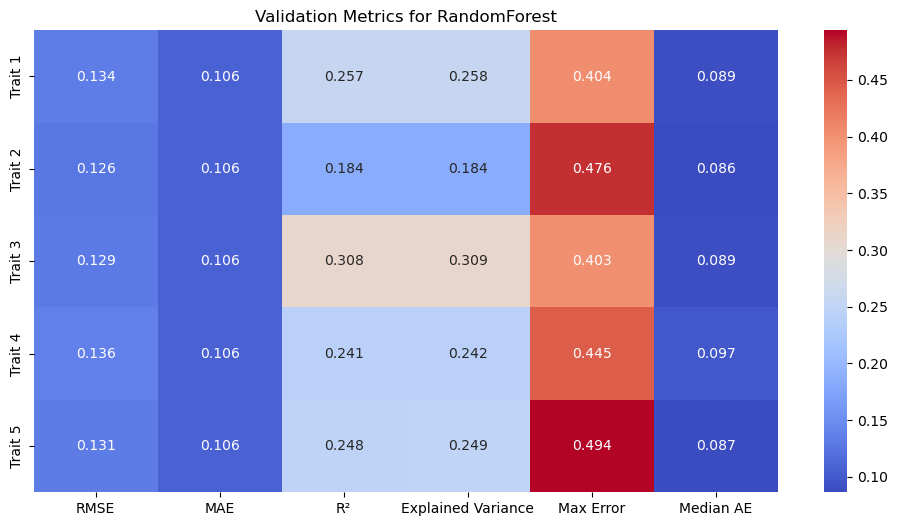

Model saved to: models_no_pca\RandomForest_Validation.pkl

RandomForest - Test Evaluation
             RMSE       MAE        R²  Explained Variance  Max Error  \
Trait 1  0.129491  0.103942  0.249354            0.249702   0.374493   
Trait 2  0.120471  0.103942  0.163204            0.163344   0.363877   
Trait 3  0.133176  0.103942  0.288316            0.289465   0.412854   
Trait 4  0.132914  0.103942  0.219881            0.219880   0.411976   
Trait 5  0.129539  0.103942  0.213426            0.217358   0.433306   
Average  0.129118  0.103942  0.226836            0.227950   0.399301   

         Median AE  
Trait 1   0.093148  
Trait 2   0.080408  
Trait 3   0.093184  
Trait 4   0.092702  
Trait 5   0.089695  
Average   0.089827  


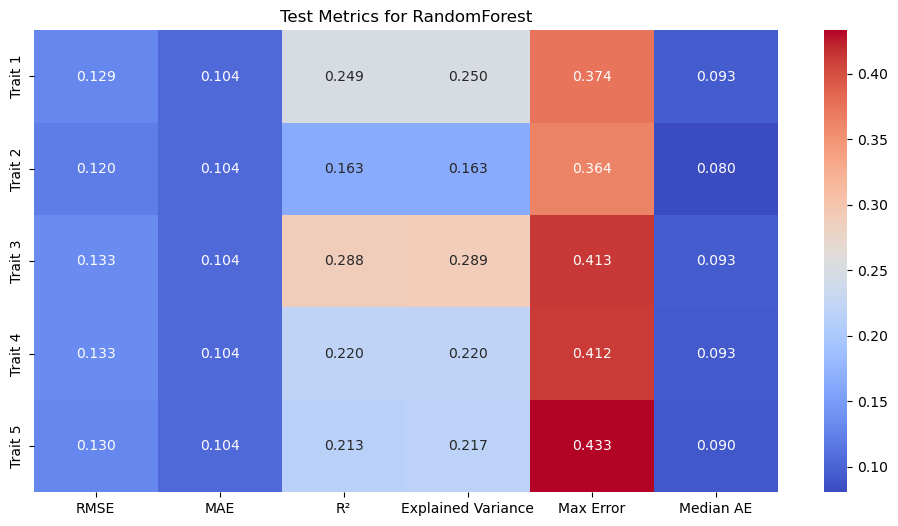

Model saved to: models_no_pca\RandomForest_Test.pkl
training ExtraTrees

ExtraTrees - Validation Evaluation
             RMSE      MAE        R²  Explained Variance  Max Error  Median AE
Trait 1  0.128883  0.10088  0.312555            0.312745   0.404860   0.086480
Trait 2  0.122026  0.10088  0.235833            0.235939   0.459194   0.085128
Trait 3  0.122309  0.10088  0.381634            0.381974   0.414369   0.083172
Trait 4  0.131813  0.10088  0.292017            0.292396   0.478889   0.087708
Trait 5  0.126921  0.10088  0.297193            0.297573   0.474444   0.084370
Average  0.126391  0.10088  0.303847            0.304126   0.446351   0.085372


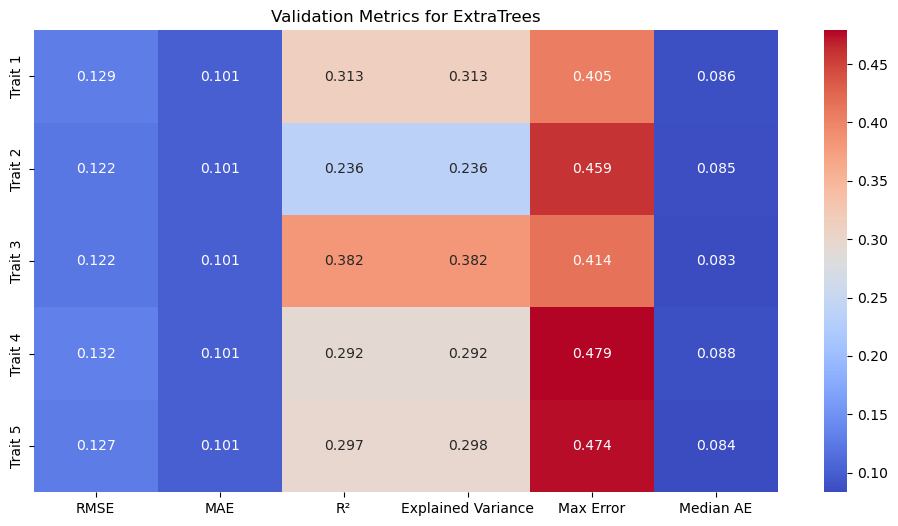

Model saved to: models_no_pca\ExtraTrees_Validation.pkl

ExtraTrees - Test Evaluation
             RMSE       MAE        R²  Explained Variance  Max Error  \
Trait 1  0.124656  0.099773  0.304367            0.304652   0.362617   
Trait 2  0.116925  0.099773  0.211744            0.211852   0.352527   
Trait 3  0.126941  0.099773  0.353397            0.354637   0.437217   
Trait 4  0.128351  0.099773  0.272522            0.272521   0.428611   
Trait 5  0.124700  0.099773  0.271091            0.273884   0.431333   
Average  0.124315  0.099773  0.282624            0.283509   0.402461   

         Median AE  
Trait 1   0.085296  
Trait 2   0.076300  
Trait 3   0.086117  
Trait 4   0.086806  
Trait 5   0.083963  
Average   0.083696  


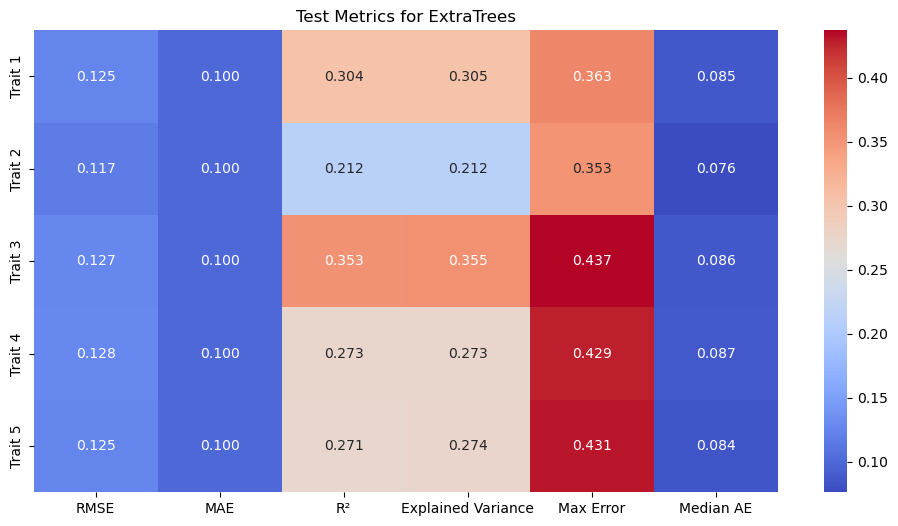

Model saved to: models_no_pca\ExtraTrees_Test.pkl
training Ridge

Ridge - Validation Evaluation
             RMSE       MAE        R²  Explained Variance  Max Error  \
Trait 1  0.131266  0.101604  0.286907            0.287039   0.419407   
Trait 2  0.125111  0.101604  0.196698            0.196942   0.529362   
Trait 3  0.120978  0.101604  0.395018            0.395269   0.425845   
Trait 4  0.134873  0.101604  0.258774            0.259242   0.438871   
Trait 5  0.127246  0.101604  0.293588            0.293950   0.440403   
Average  0.127895  0.101604  0.286197            0.286489   0.450777   

         Median AE  
Trait 1   0.087832  
Trait 2   0.082725  
Trait 3   0.079157  
Trait 4   0.090234  
Trait 5   0.086016  
Average   0.085193  


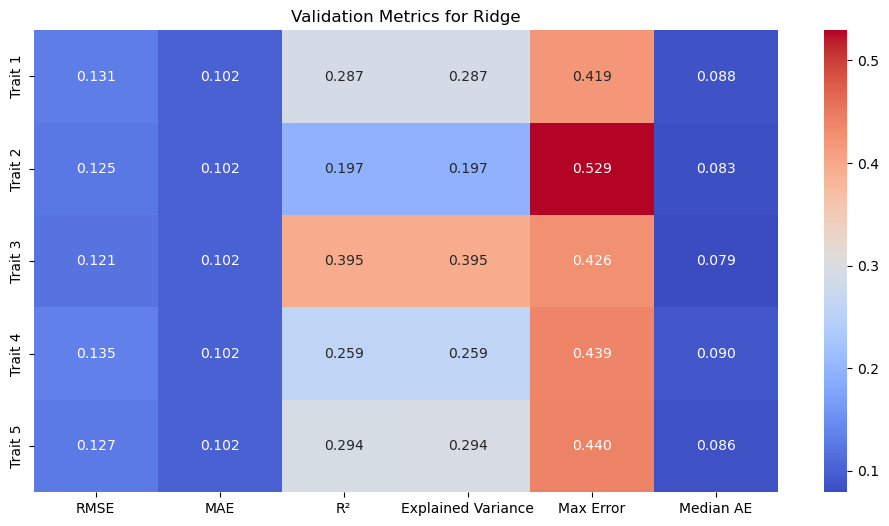

Model saved to: models_no_pca\Ridge_Validation.pkl

Ridge - Test Evaluation
             RMSE       MAE        R²  Explained Variance  Max Error  \
Trait 1  0.132372  0.102726  0.215589            0.216786   0.407735   
Trait 2  0.121148  0.102726  0.153775            0.155363   0.396239   
Trait 3  0.125789  0.102726  0.365085            0.366995   0.395561   
Trait 4  0.133501  0.102726  0.212970            0.213279   0.418567   
Trait 5  0.128064  0.102726  0.231232            0.236905   0.482555   
Average  0.128175  0.102726  0.235730            0.237866   0.420131   

         Median AE  
Trait 1   0.091608  
Trait 2   0.081835  
Trait 3   0.085571  
Trait 4   0.088846  
Trait 5   0.087623  
Average   0.087097  


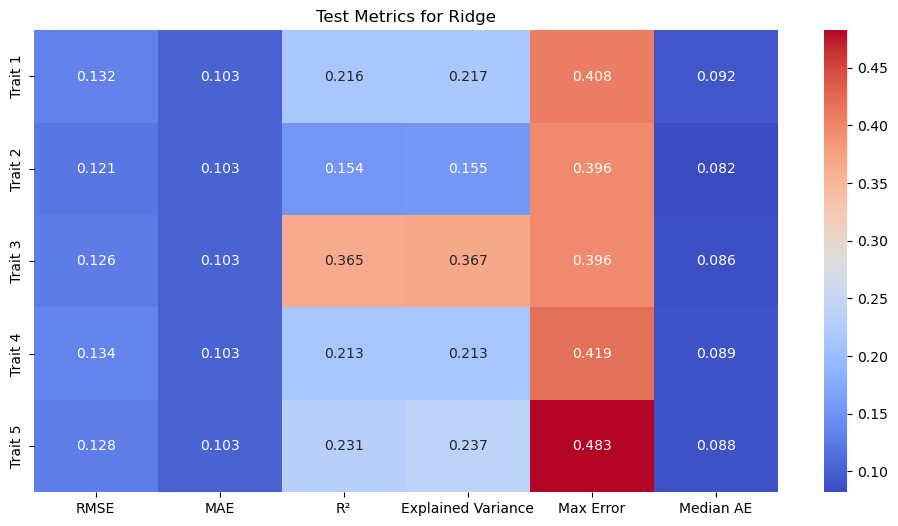

Model saved to: models_no_pca\Ridge_Test.pkl
training SVR

SVR - Validation Evaluation
             RMSE       MAE        R²  Explained Variance  Max Error  \
Trait 1  0.129134  0.101062  0.309879            0.310110   0.421192   
Trait 2  0.124547  0.101062  0.203929            0.206717   0.504492   
Trait 3  0.121062  0.101062  0.394178            0.394795   0.406313   
Trait 4  0.133040  0.101062  0.278781            0.280154   0.446095   
Trait 5  0.125837  0.101062  0.309153            0.309802   0.423173   
Average  0.126724  0.101062  0.299184            0.300315   0.440253   

         Median AE  
Trait 1   0.083990  
Trait 2   0.082779  
Trait 3   0.081054  
Trait 4   0.089696  
Trait 5   0.085990  
Average   0.084702  


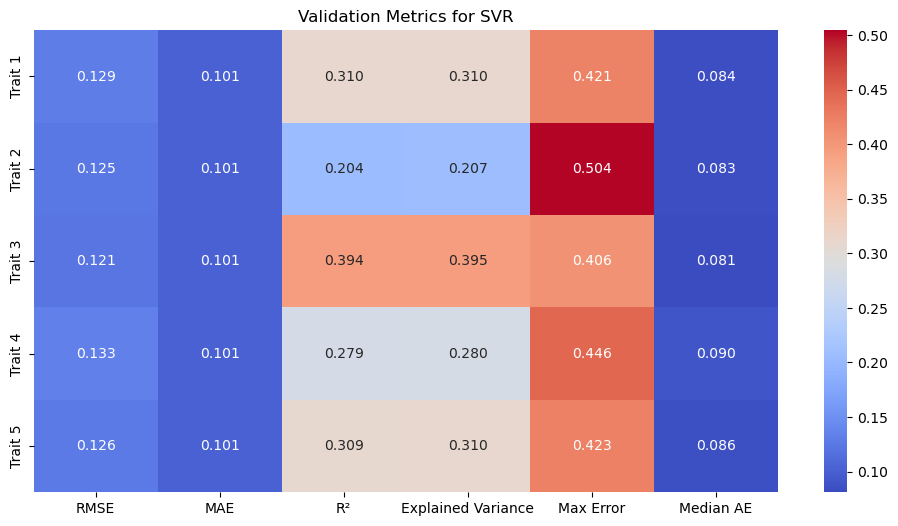

Model saved to: models_no_pca\SVR_Validation.pkl

SVR - Test Evaluation
             RMSE       MAE        R²  Explained Variance  Max Error  \
Trait 1  0.127578  0.100907  0.271374            0.271766   0.419325   
Trait 2  0.118904  0.100907  0.184837            0.187972   0.384894   
Trait 3  0.125050  0.100907  0.372517            0.374481   0.392519   
Trait 4  0.131481  0.100907  0.236609            0.237133   0.410777   
Trait 5  0.126730  0.100907  0.247164            0.250916   0.484933   
Average  0.125949  0.100907  0.262500            0.264454   0.418490   

         Median AE  
Trait 1   0.090252  
Trait 2   0.080234  
Trait 3   0.085725  
Trait 4   0.090005  
Trait 5   0.085335  
Average   0.086310  


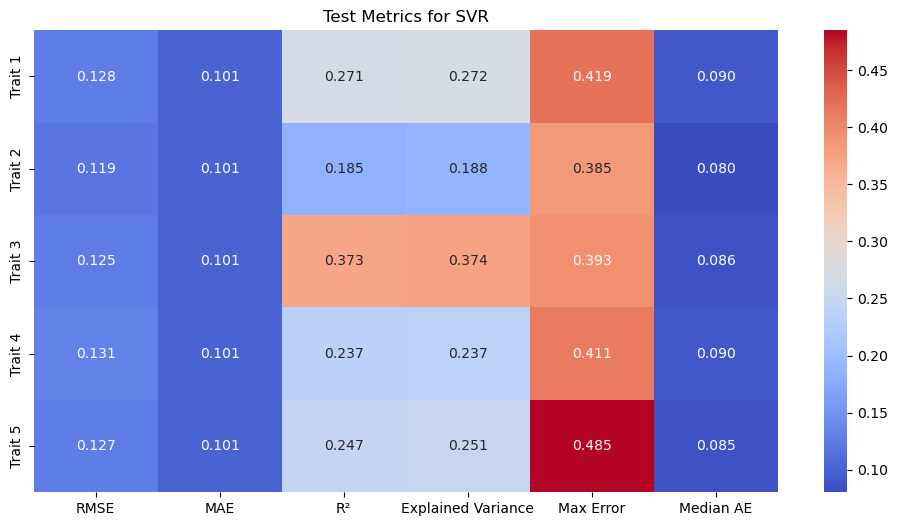

Model saved to: models_no_pca\SVR_Test.pkl
training XGBoost

XGBoost - Validation Evaluation
             RMSE       MAE        R²  Explained Variance  Max Error  \
Trait 1  0.132330  0.103507  0.275291            0.275328   0.444136   
Trait 2  0.126294  0.103507  0.181431            0.181540   0.498508   
Trait 3  0.123366  0.103507  0.370903            0.370987   0.381353   
Trait 4  0.135337  0.103507  0.253656            0.254098   0.436050   
Trait 5  0.128126  0.103507  0.283793            0.284224   0.468342   
Average  0.129091  0.103507  0.273015            0.273235   0.445678   

         Median AE  
Trait 1   0.087814  
Trait 2   0.086921  
Trait 3   0.084479  
Trait 4   0.095869  
Trait 5   0.085164  
Average   0.088049  


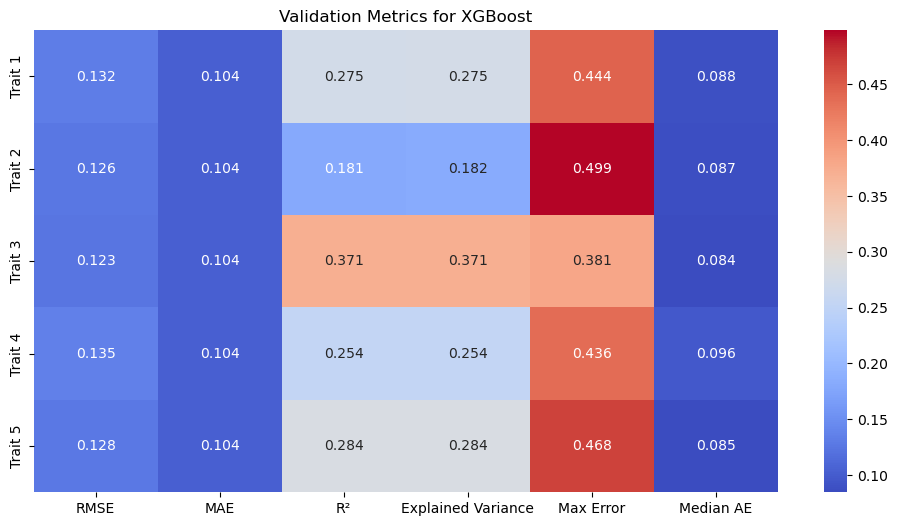

Model saved to: models_no_pca\XGBoost_Validation.pkl

XGBoost - Test Evaluation
             RMSE       MAE        R²  Explained Variance  Max Error  \
Trait 1  0.127960  0.102239  0.266996            0.267069   0.416647   
Trait 2  0.119674  0.102239  0.174245            0.174457   0.387686   
Trait 3  0.127825  0.102239  0.344356            0.345136   0.383773   
Trait 4  0.133345  0.102239  0.214810            0.214869   0.413573   
Trait 5  0.127599  0.102239  0.236806            0.239220   0.475943   
Average  0.127281  0.102239  0.247443            0.248150   0.415524   

         Median AE  
Trait 1   0.090472  
Trait 2   0.079852  
Trait 3   0.088694  
Trait 4   0.090632  
Trait 5   0.088626  
Average   0.087655  


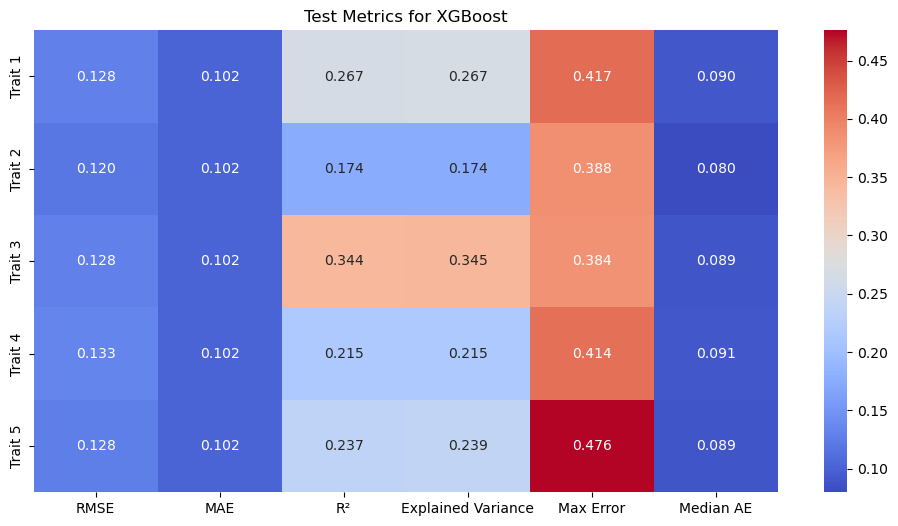

Model saved to: models_no_pca\XGBoost_Test.pkl


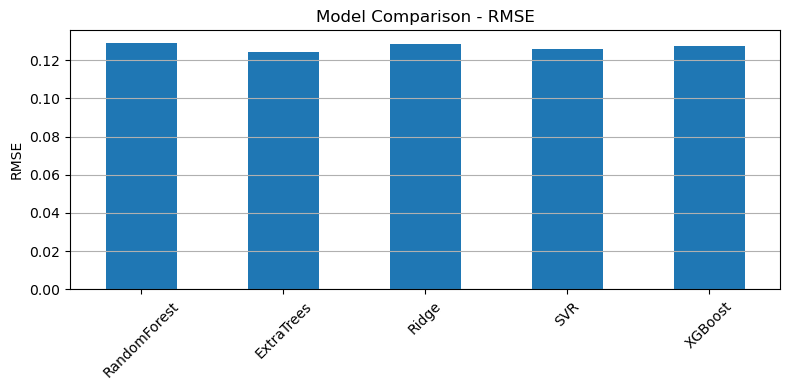

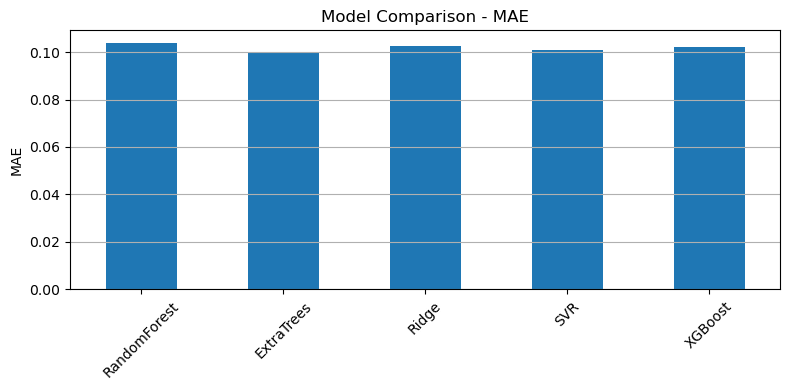

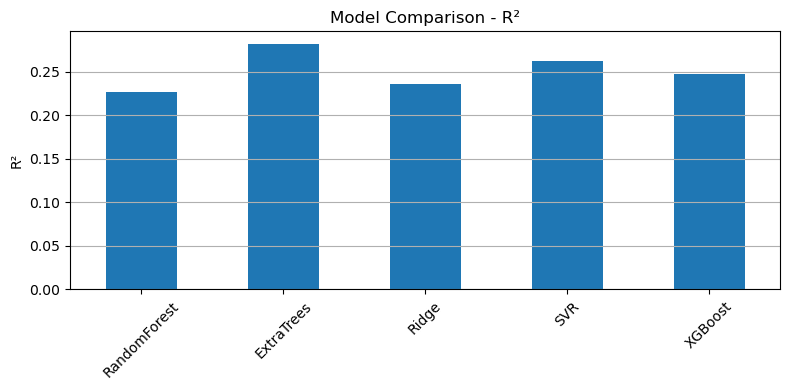

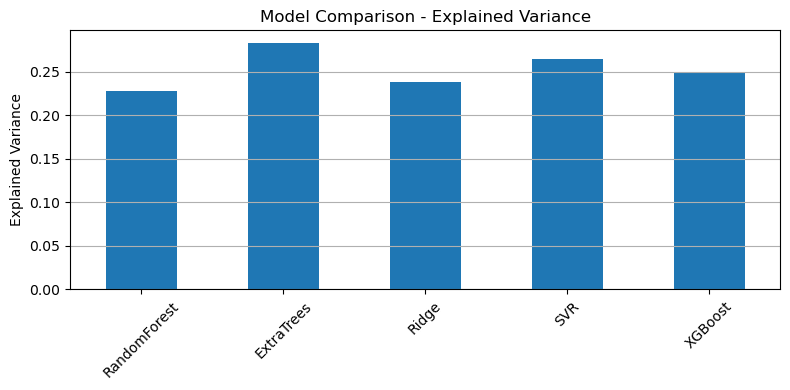

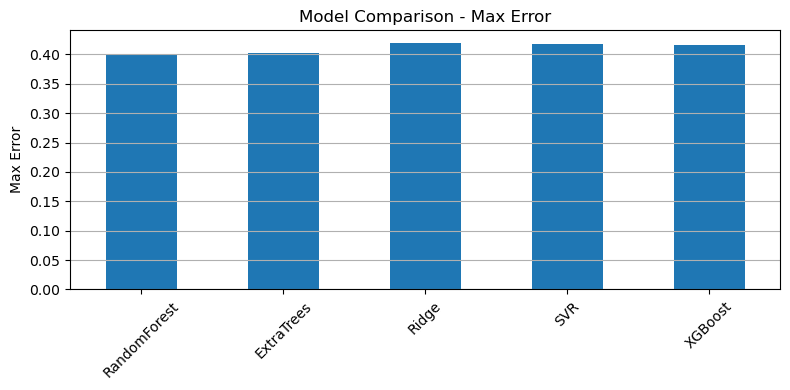

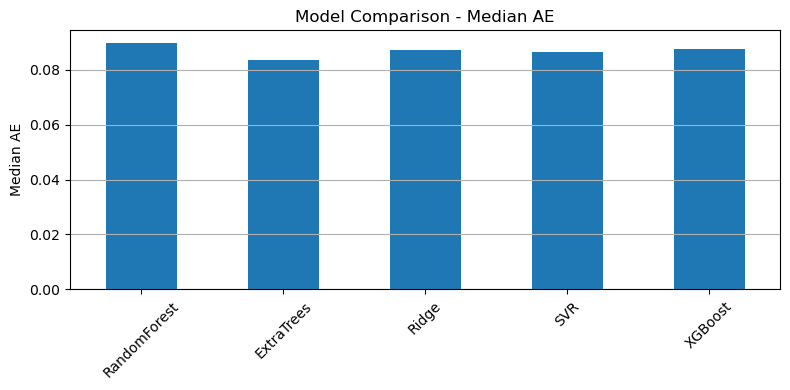

In [10]:
test_results = {}  # To store averaged metric Series per model
for name, model in models.items():
    print(f"training {name}")
    model.fit(X_train, y_train)
    evaluate_model(name, model, X_val, y_val, "Validation")

    # Save only test evaluation (average row) for comparison plots
    avg_metrics = evaluate_model(name, model, X_test, y_test, "Test")
    test_results[name] = avg_metrics

# Combine all model averages into a comparison DataFrame
comparison_df = pd.DataFrame(test_results).T  # Models as rows, metrics as columns

# Plot one comparative bar chart per metric
for metric in comparison_df.columns:
    plt.figure(figsize=(8, 4))
    comparison_df[metric].plot(kind='bar', title=f'Model Comparison - {metric}')
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.show()

In [11]:
oof_train_preds = []
val_preds = []
test_preds = []

for name, model in models.items():
    print(f"Training {name}")
    model.fit(X_train, y_train)

    train_pred = model.predict(X_train)
    val_pred = model.predict(X_val)
    test_pred = model.predict(X_test)

    oof_train_preds.append(train_pred)
    val_preds.append(val_pred)
    test_preds.append(test_pred)

stacked_train = np.hstack(oof_train_preds)
stacked_val = np.hstack(val_preds)
stacked_test = np.hstack(test_preds)

print("Stacked train shape:", stacked_train.shape)
print("Stacked val shape:", stacked_val.shape)
print("Stacked test shape:", stacked_test.shape)


Training RandomForest
Training ExtraTrees
Training Ridge
Training SVR
Training XGBoost
Stacked train shape: (4798, 25)
Stacked val shape: (1599, 25)
Stacked test shape: (1600, 25)


In [12]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor
import joblib
import os

print("Tuning MultiOutput(HistGradientBoostingRegressor) as Meta-Learner...")

base_model = HistGradientBoostingRegressor(random_state=42)
meta_base = MultiOutputRegressor(base_model)

meta_params = {
    'estimator__max_iter': [100, 200, 300],
    'estimator__max_depth': [3, 5, 7],
    'estimator__learning_rate': [0.01, 0.05, 0.1]
}

meta_search = GridSearchCV(meta_base, meta_params, cv=3, scoring='neg_mean_squared_error',
                           verbose=1, n_jobs=-1)
meta_search.fit(stacked_train, y_train)

# Get the best model
meta_model = meta_search.best_estimator_
print("Meta-learner tuning done.\n")

# Save the meta-model
os.makedirs("models_no_pca", exist_ok=True)
joblib.dump(meta_model, "models_no_pca/meta_model.pkl")
print("Meta-model saved to models_no_pca/meta_model.pkl")

# Make predictions
val_meta_preds = meta_model.predict(stacked_val)
test_meta_preds = meta_model.predict(stacked_test)


Tuning MultiOutput(HistGradientBoostingRegressor) as Meta-Learner...
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Meta-learner tuning done.

Meta-model saved to models_no_pca/meta_model.pkl



=== Deep Super Learner Meta-Model Metrics (Validation) ===
             RMSE       MAE        R²  Explained Variance  Max Error  \
Trait 1  0.128935  0.100837  0.312006            0.312183   0.401883   
Trait 2  0.122028  0.100837  0.235807            0.235888   0.461565   
Trait 3  0.122447  0.100837  0.380236            0.380567   0.417465   
Trait 4  0.131880  0.100837  0.291302            0.291668   0.479142   
Trait 5  0.126983  0.100837  0.296513            0.296885   0.475880   
Average  0.126454  0.100837  0.303173            0.303438   0.447187   

         Median AE  
Trait 1   0.084123  
Trait 2   0.087895  
Trait 3   0.087357  
Trait 4   0.083360  
Trait 5   0.088858  
Average   0.086319  


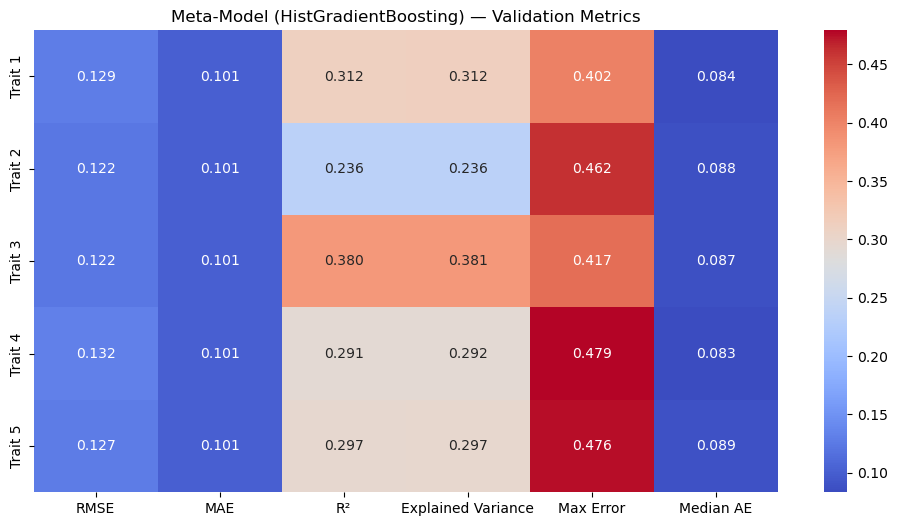


=== Deep Super Learner Meta-Model Metrics (Test) ===
             RMSE       MAE        R²  Explained Variance  Max Error  \
Trait 1  0.124651  0.099693  0.304425            0.304726   0.364497   
Trait 2  0.116864  0.099693  0.212564            0.212673   0.351679   
Trait 3  0.126952  0.099693  0.353287            0.354530   0.436925   
Trait 4  0.128203  0.099693  0.274203            0.274204   0.427023   
Trait 5  0.124735  0.099693  0.270683            0.273520   0.433330   
Average  0.124281  0.099693  0.283032            0.283931   0.402691   

         Median AE  
Trait 1   0.084122  
Trait 2   0.076929  
Trait 3   0.087371  
Trait 4   0.083358  
Trait 5   0.088863  
Average   0.084129  


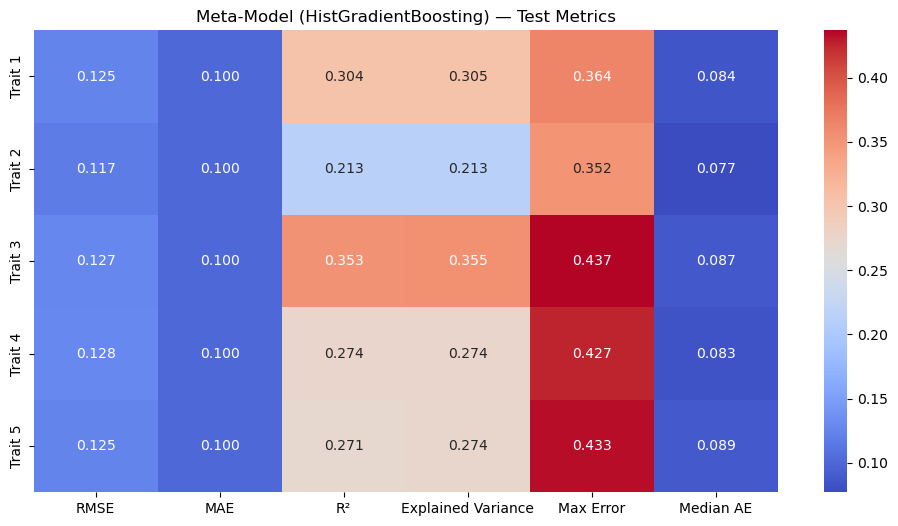

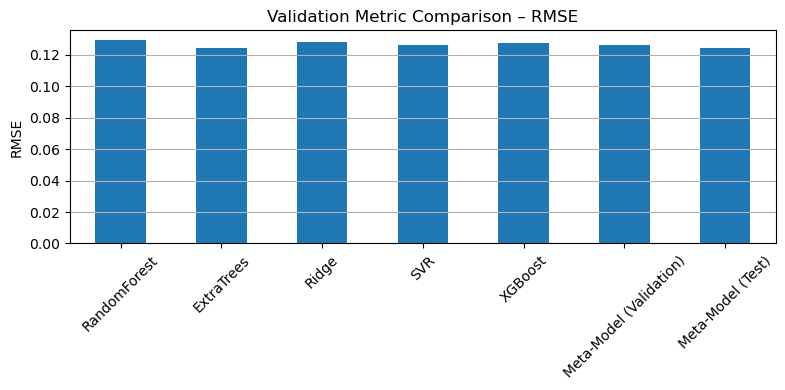

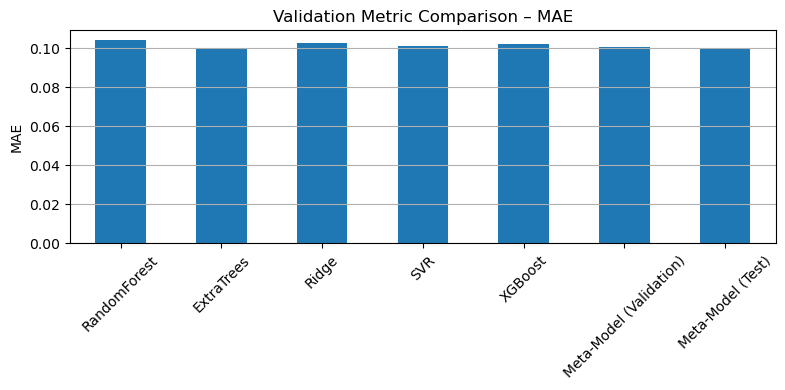

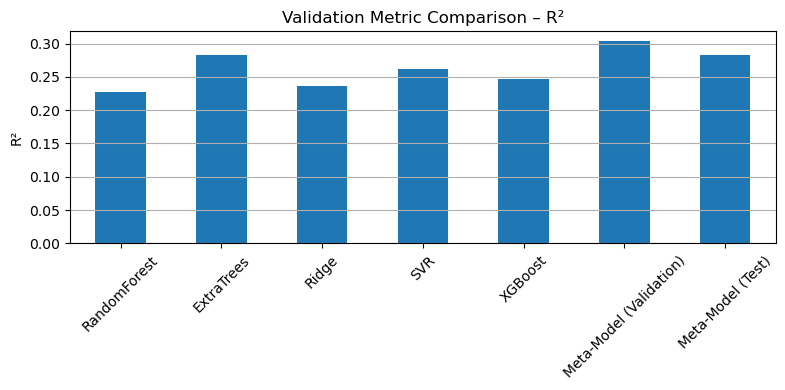

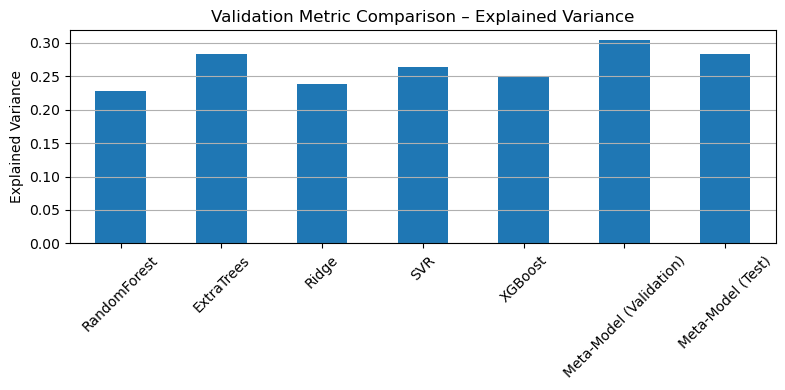

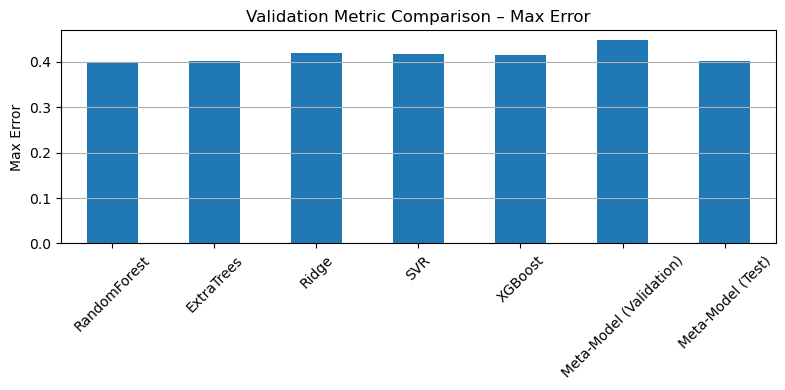

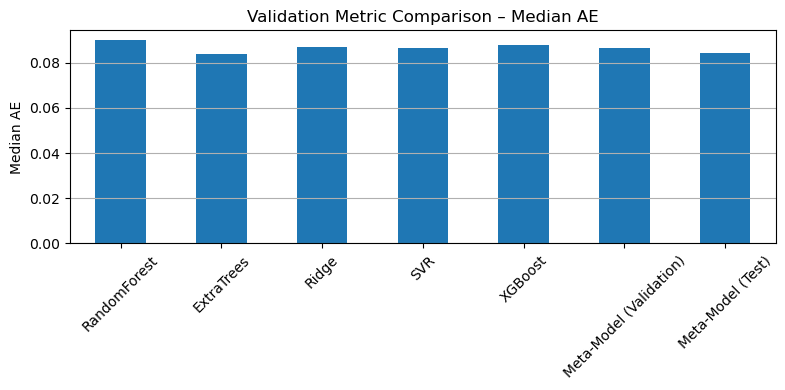

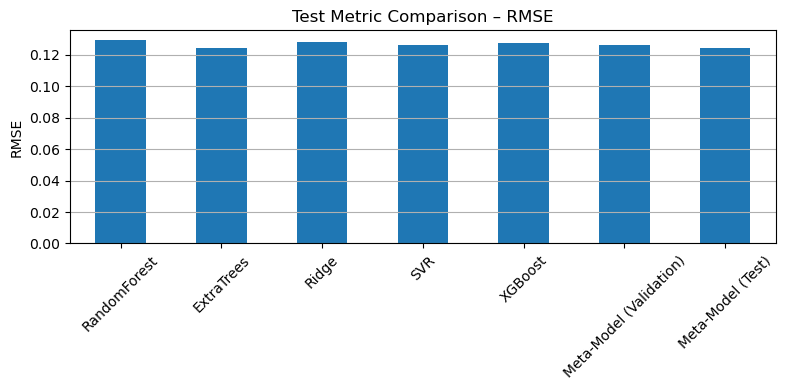

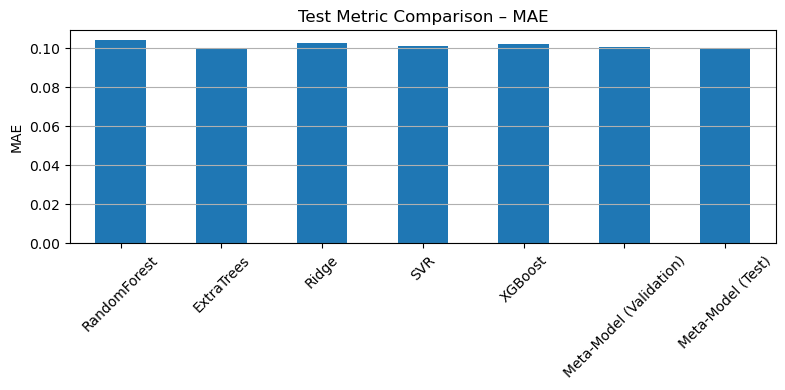

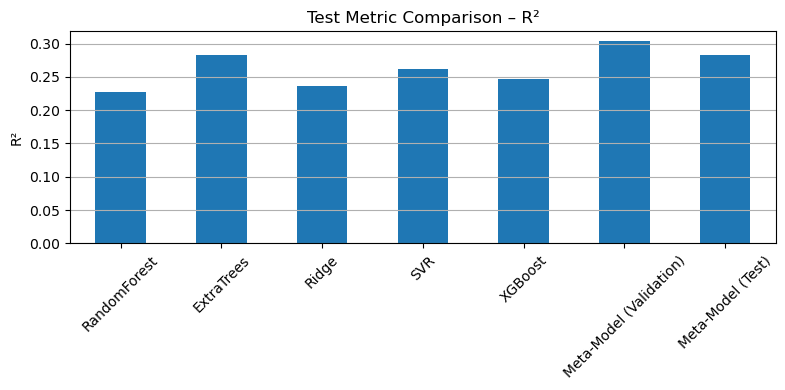

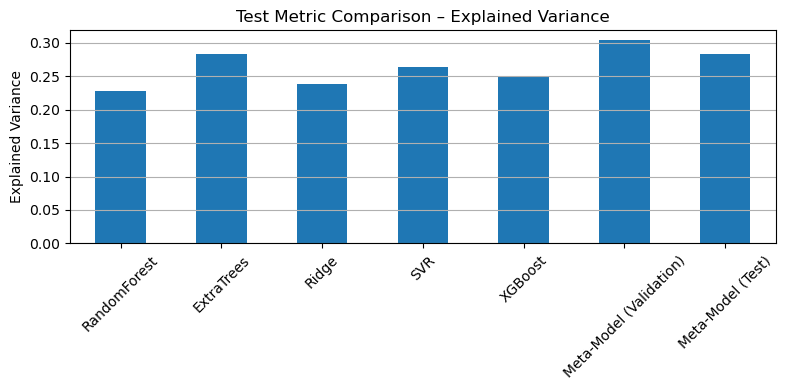

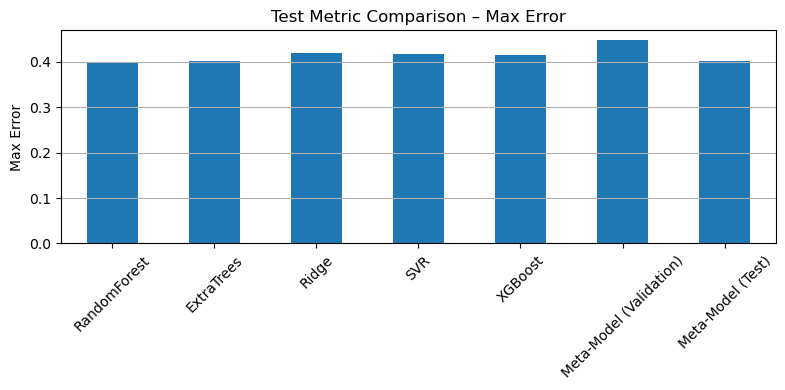

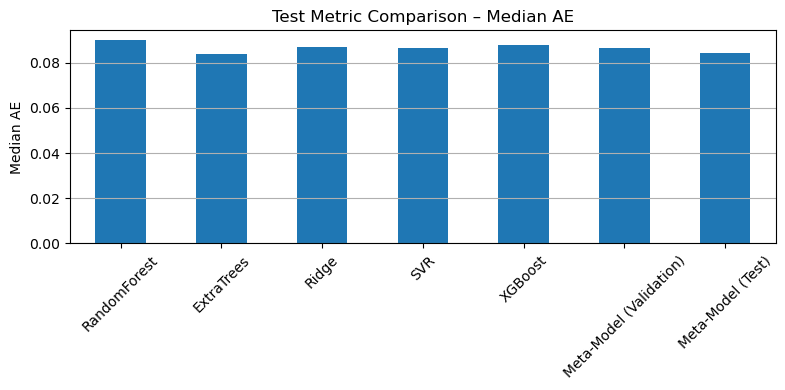

In [13]:
# Function to evaluate predictions and return average metrics
def evaluate_predictions(y_true, y_pred, label):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred, multioutput='raw_values'))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred, multioutput='raw_values')
    expl_var = explained_variance_score(y_true, y_pred, multioutput='raw_values')
    max_err = [max_error(y_true[:, i], y_pred[:, i]) for i in range(y_true.shape[1])]
    med_ae = [median_absolute_error(y_true[:, i], y_pred[:, i]) for i in range(y_true.shape[1])]

    metrics_dict = {
        "RMSE": rmse,
        "MAE": [mae] * len(rmse),
        "R²": r2,
        "Explained Variance": expl_var,
        "Max Error": max_err,
        "Median AE": med_ae,
    }

    metrics_df = pd.DataFrame(metrics_dict, index=[f"Trait {i+1}" for i in range(len(rmse))])
    averages = {k: np.mean(v) if isinstance(v, (list, np.ndarray)) else v for k, v in metrics_dict.items()}
    metrics_df.loc["Average"] = averages

    print(f"\n=== Deep Super Learner Meta-Model Metrics ({label}) ===")
    print(metrics_df)

    # Plot heatmap for visualization
    plt.figure(figsize=(12, 6))
    sns.heatmap(metrics_df.iloc[:-1].astype(float), annot=True, fmt=".3f", cmap="coolwarm")
    plt.title(f"Meta-Model (HistGradientBoosting) — {label} Metrics")
    plt.show()

    return pd.Series(averages, name=f"Meta-Model ({label})")

# Assuming val_meta_preds and test_meta_preds are already defined, as well as y_val, y_test
# Evaluate and store results for validation and test sets
meta_val_avg_metrics = evaluate_predictions(y_val, val_meta_preds, "Validation")
meta_test_avg_metrics = evaluate_predictions(y_test, test_meta_preds, "Test")

# Initialize comparison DataFrames if not done already
# Assuming test_results has been filled with base models' average metrics
comparison_df = pd.DataFrame(test_results).T  # base models results

# Store meta-learner results in comparison_df
comparison_df.loc["Meta-Model (Validation)"] = meta_val_avg_metrics
comparison_df.loc["Meta-Model (Test)"] = meta_test_avg_metrics

# Plotting model comparison for validation metrics
for metric in comparison_df.columns:
    plt.figure(figsize=(8, 4))
    comparison_df[metric].plot(kind='bar')
    plt.title(f'Validation Metric Comparison – {metric}')
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.show()

# Plotting model comparison for test metrics
for metric in comparison_df.columns:
    plt.figure(figsize=(8, 4))
    comparison_df[metric].plot(kind='bar')
    plt.title(f'Test Metric Comparison – {metric}')
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.show()

In [14]:
import torch
from torchvision import transforms, models
from PIL import Image
import numpy as np

# Load ResNet50 model without final layer
def load_resnet_model():
    resnet = models.resnet50(pretrained=True)
    resnet = torch.nn.Sequential(*list(resnet.children())[:-1])
    resnet.eval()
    return resnet

# Transform and extract features
def extract_features_from_image(image_path, resnet):
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
    ])
    image = Image.open(image_path).convert("RGB")
    image_tensor = transform(image).unsqueeze(0)
    with torch.no_grad():
        features = resnet(image_tensor).squeeze().numpy()
    return features.reshape(1, -1)  # For sklearn model input


In [15]:
import joblib

def predict_personality_from_image(image_path, model_path):
    # Load model
    model = joblib.load(model_path)
    
    # Load ResNet and extract features
    resnet = load_resnet_model()
    features = extract_features_from_image(image_path, resnet)
    
    # Predict Big Five traits
    prediction = model.predict(features)
    return prediction[0]  # return as flat array
